# MICROSOFT FIRST MOVIE !!

****

***

<img src="https://c1.neweggimages.com/ProductImage/A1HE_1_20150608440085200.jpg">

<span style='font-size:20px'>Microsoft has decided to enter the movie business and has tasked us to prepare some data to choose the best course of action. Our goal is to sort through the data given in order to create our first successful original movie. The cell below list the data we pulled from. Our goal is to come up with three actionale insights from the data provided.
Since the data given are too vague we have to merge a tow or more datfrmes in order to get better insight

<span style='font-size:20px'>First we import the necessary libraries in order to open our dataframes

In [214]:

import pandas as pd
import numpy as np
from zipfile import ZipFile
import gzip
import sqlite3
import matplotlib.pyplot as plt
import sql


In [90]:
df= pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [91]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


<span style='font-size:20px'>Our first dataframe give us a list of movies with their production budget and worldwide gross. With this information we can calculate a net profit for these movies. 
But first we need to clean our dataframe

# Converting to intergers

<span style='font-size:20px'>We need to subtract the production budget from the worldwide gross in order to get the net profit. However we cant just subtract the numbers as such so step one we will strip the dollar signs ('$') from our two columns: worldwide gross and production budget

In [92]:
df1 = df.worldwide_gross.apply(lambda x: x.strip('$'))  


In [93]:
df1

0       2,776,345,279
1       1,045,663,875
2         149,762,350
3       1,403,013,963
4       1,316,721,747
            ...      
5777                0
5778          240,495
5779            1,338
5780                0
5781          181,041
Name: worldwide_gross, Length: 5782, dtype: object

In [94]:
df2 = df.production_budget.apply(lambda x: x.strip('$'))


In [95]:
df2

0       425,000,000
1       410,600,000
2       350,000,000
3       330,600,000
4       317,000,000
           ...     
5777          7,000
5778          6,000
5779          5,000
5780          1,400
5781          1,100
Name: production_budget, Length: 5782, dtype: object

<span style='font-size:20px'>Now that we have accomplished that, we then need to replace the commas in these two columns 

In [96]:
df1 = [col.replace(',', '') for col in df1]


In [97]:
df1

['2776345279',
 '1045663875',
 '149762350',
 '1403013963',
 '1316721747',
 '2053311220',
 '2048134200',
 '963420425',
 '655945209',
 '879620923',
 '1084439099',
 '393151347',
 '260002115',
 '282778100',
 '586477240',
 '894860230',
 '1140069413',
 '867500281',
 '1017003568',
 '935213767',
 '960366855',
 '945577621',
 '1234846267',
 '374085065',
 '788241137',
 '591692078',
 '1517935897',
 '1066215812',
 '667999518',
 '417341288',
 '757890267',
 '313477717',
 '602893340',
 '1648854864',
 '654213485',
 '836519699',
 '1104039076',
 '459260946',
 '322459006',
 '550517357',
 '367262558',
 '1348258224',
 '2208208395',
 '1242520711',
 '1049102856',
 '1021215193',
 '1068879522',
 '1215392272',
 '862316233',
 '795110670',
 '1025491110',
 '1110526981',
 '743588329',
 '490359051',
 '747862775',
 '708996336',
 '560155383',
 '400062763',
 '757677748',
 '652220086',
 '365491792',
 '219535492',
 '336359676',
 '1123790543',
 '409953905',
 '197687603',
 '1518722794',
 '467381584',
 '531514650',
 '3510404

In [98]:
df2 = [col.replace(',', '') for col in df2]


In [99]:
df2

['425000000',
 '410600000',
 '350000000',
 '330600000',
 '317000000',
 '306000000',
 '300000000',
 '300000000',
 '300000000',
 '300000000',
 '275000000',
 '275000000',
 '275000000',
 '275000000',
 '260000000',
 '258000000',
 '250000000',
 '250000000',
 '250000000',
 '250000000',
 '250000000',
 '250000000',
 '250000000',
 '232000000',
 '230000000',
 '230000000',
 '225000000',
 '225000000',
 '225000000',
 '225000000',
 '220000000',
 '220000000',
 '217000000',
 '215000000',
 '215000000',
 '210000000',
 '210000000',
 '210000000',
 '210000000',
 '207000000',
 '205000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '200000000',
 '195000000',
 '195000000',
 '195000000',
 '190000000',
 '190000000',
 '190000000',
 '190000000',
 '190000000',
 '1900

In [100]:
df1 

print([int(x) for x in df1])

[2776345279, 1045663875, 149762350, 1403013963, 1316721747, 2053311220, 2048134200, 963420425, 655945209, 879620923, 1084439099, 393151347, 260002115, 282778100, 586477240, 894860230, 1140069413, 867500281, 1017003568, 935213767, 960366855, 945577621, 1234846267, 374085065, 788241137, 591692078, 1517935897, 1066215812, 667999518, 417341288, 757890267, 313477717, 602893340, 1648854864, 654213485, 836519699, 1104039076, 459260946, 322459006, 550517357, 367262558, 1348258224, 2208208395, 1242520711, 1049102856, 1021215193, 1068879522, 1215392272, 862316233, 795110670, 1025491110, 1110526981, 743588329, 490359051, 747862775, 708996336, 560155383, 400062763, 757677748, 652220086, 365491792, 219535492, 336359676, 1123790543, 409953905, 197687603, 1518722794, 467381584, 531514650, 351040419, 315709697, 411002906, 333771037, 585171547, 1001996207, 786635413, 554606532, 561072059, 335802233, 259357408, 619234314, 846980024, 720539572, 758536735, 802402853, 532508025, 256585882, 348902025, 18004

<span style='font-size:20px'>We have succeeded in cleaning our data a little bit we can create our own new rows and add them to this dataframe 

In [101]:
df['New1']=df1

In [102]:
df['New2']=df2

In [103]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,New1,New2
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2776345279,425000000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1045663875,410600000
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",149762350,350000000
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1403013963,330600000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1316721747,317000000
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0,7000
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",240495,6000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",1338,5000
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,0,1400


<span style='font-size:20px'>With the two new rows added we can then subtract our production budget column form the worldwide column as intended but first making sure they are all integers

In [104]:
df = df.astype({'New1': 'int64', 'New2': 'int64'})

In [105]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,New1,New2
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2776345279,425000000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1045663875,410600000
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",149762350,350000000
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1403013963,330600000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1316721747,317000000
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0,7000
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",240495,6000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",1338,5000
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,0,1400


<span style='font-size:20px'>Now we subtract and add in our result to a new created row 

In [106]:
df['Net_profit'] = df.apply(lambda row: row.New1 - row.New2, axis = 1)

In [107]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,New1,New2,Net_profit
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2776345279,425000000,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1045663875,410600000,635063875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",149762350,350000000,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1403013963,330600000,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1316721747,317000000,999721747
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0,7000,-7000
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",240495,6000,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",1338,5000,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,0,1400,-1400


<span style='font-size:20px'>To make things simple i will choose the first 5 movies of our datframe and sort them by max net profit to min net profit
Also assigning a new variable to be able to call our new dataframe later


In [108]:
new_data=df.head(5)

In [109]:
new_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,New1,New2,Net_profit
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2776345279,425000000,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1045663875,410600000,635063875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",149762350,350000000,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1403013963,330600000,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1316721747,317000000,999721747


In [110]:
X= new_data.sort_values('Net_profit', ascending=False)

In [111]:
X

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,New1,New2,Net_profit
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2776345279,425000000,2351345279
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1403013963,330600000,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1316721747,317000000,999721747
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1045663875,410600000,635063875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",149762350,350000000,-200237650


<span style='font-size:20px'>Here is a visualization of how our data currenlty look. Detailing our production budget as column "New2' and the Net_profit

<AxesSubplot:xlabel='movie'>

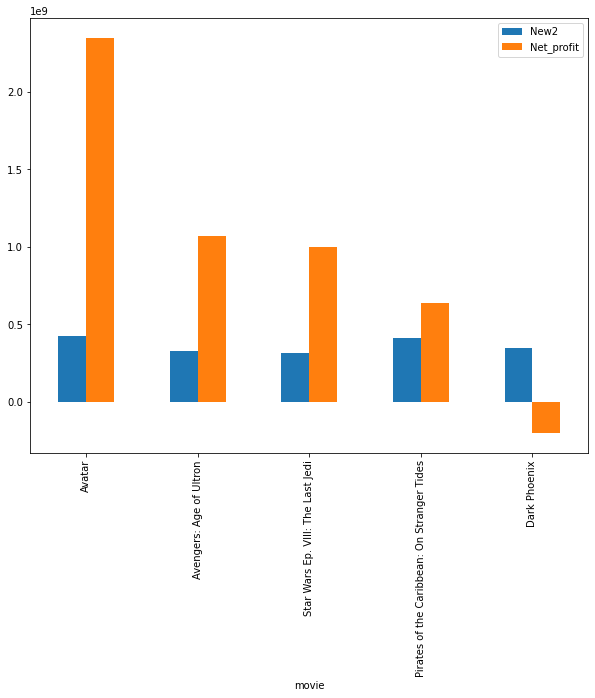

In [112]:
X.plot(x='movie', y=['New2', 'Net_profit'], kind='bar', figsize=(10, 8))

<span style='font-size:20px'>Although we were able to calculate the net profit, not much else can be done with that information. I will create one more variable with the columns Movie and net profit to be called upon later.

In [113]:
data1=X[['movie'] + ['Net_profit']]

In [114]:
data1

,movie,Net_profit
0,Avatar,2351345279
3,Avengers: Age of Ultron,1072413963
4,Star Wars Ep. VIII: The Last Jedi,999721747
1,Pirates of the Caribbean: On Stranger Tides,635063875
2,Dark Phoenix,-200237650


<span style='font-size:20px'>As stated above we have to merge our data. Upon insepction we see that none of our data matches. One way we can merge and create a new dataframe is to create a common column to which we are able to merge the data on
Below i assigned a new column named 'order' into our first dataframe

In [115]:
order = ['1', '2', '3', '4', '5']
new_dataframe = data1.assign(order = order)

In [116]:
new_dataframe

,movie,Net_profit,order
0,Avatar,2351345279,1
3,Avengers: Age of Ultron,1072413963,2
4,Star Wars Ep. VIII: The Last Jedi,999721747,3
1,Pirates of the Caribbean: On Stranger Tides,635063875,4
2,Dark Phoenix,-200237650,5


# Opening next data

In [201]:
df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', delimiter= "\t")


In [202]:
df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


<span style='font-size:20px'>In this dataframe we find a few useful information, such as directors, box office hits, and studio. Box office hits is a measurable component of how well a movie did. We can then pair it with studio with the most box office hits and see which directors are linked

<span style='font-size:20px'>But first we should sort the values for better use

In [203]:
df_new= df.sort_values(by=['studio','box_office'], ascending =[True , False])


In [204]:
df_new

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
378,491,The jumbo-sized Baker family are back in this ...,PG,Comedy|Kids and Family,Adam Shankman,Sam Harper,"Dec 21, 2005","May 23, 2006",$,"82,468,131",93 minutes,20th Century Fox
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox
1073,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
120,153,"Meet the kid who made ""wimpy"" cool in a family...",PG,Comedy|Kids and Family,Thor Freudenthal,Jackie Filgo|Jeff Filgo|Gabe Sachs|Jeff Judah,"Mar 19, 2010","Aug 3, 2010",$,"64,001,297",93 minutes,20th Century Fox
546,715,This psychological thriller from screenwriter ...,R,Drama|Mystery and Suspense,Gary Fleder,Patrick Kelly|Anthony Peckham,"Sep 28, 2001","Feb 19, 2002",$,"54,218,420",110 minutes,20th Century Fox
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1991,Popular rap group Run DMC stars as a trio of p...,R,Action and Adventure|Drama,Rick Rubin,Rick Rubin|Ric Menello,NaN,NaN,NaN,NaN,92 minutes,NaN
1552,1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991","May 20, 2003",NaN,NaN,116 minutes,NaN
1553,1993,A former child actor turned talent agent is hi...,PG,Comedy,James Lapine,NaN,"Jun 4, 1993","Apr 8, 2003",NaN,NaN,95 minutes,NaN
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN


<span style='font-size:20px'>Next step is to drop the NAN values 

In [205]:
lol=df_new.dropna()

In [206]:
lol

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
378,491,The jumbo-sized Baker family are back in this ...,PG,Comedy|Kids and Family,Adam Shankman,Sam Harper,"Dec 21, 2005","May 23, 2006",$,"82,468,131",93 minutes,20th Century Fox
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox
120,153,"Meet the kid who made ""wimpy"" cool in a family...",PG,Comedy|Kids and Family,Thor Freudenthal,Jackie Filgo|Jeff Filgo|Gabe Sachs|Jeff Judah,"Mar 19, 2010","Aug 3, 2010",$,"64,001,297",93 minutes,20th Century Fox
546,715,This psychological thriller from screenwriter ...,R,Drama|Mystery and Suspense,Gary Fleder,Patrick Kelly|Anthony Peckham,"Sep 28, 2001","Feb 19, 2002",$,"54,218,420",110 minutes,20th Century Fox
1511,1945,"Left on a nun's doorstep, Larry, Curly and Moe...",PG,Comedy,Bobby Farrelly|Peter Farrelly,Bobby Farrelly|Peter Farrelly|Mike Cerrone,"Apr 13, 2012","Jul 17, 2012",$,"41,800,000",92 minutes,20th Century Fox
...,...,...,...,...,...,...,...,...,...,...,...,...
1528,1965,"Because of a misunderstanding on his part, Cli...",G,Animation|Kids and Family,Robert Ramirez,Robert Ramirez|Rhett Reese,"Apr 23, 2004","Aug 24, 2004",$,"2,782,548",73 minutes,Warner Bros. Pictures
423,554,1970s-era DC antihero Jonah Hex makes his way ...,PG-13,Action and Adventure|Drama|Horror|Western,Jimmy Hayward,Mark Neveldine|Brian Taylor,"Jun 18, 2010","Oct 12, 2010",$,"10,500,000",84 minutes,Warner Bros. Pictures
1464,1884,What do you get when you mix fearless comedic ...,PG-13,Comedy,David Zucker,Craig Mazin|David Zucker,"Apr 14, 2006","Aug 15, 2006",$,"90,672,025",83 minutes,Weinstein Co.
270,356,The film follows the second Earl of Rochester'...,R,Drama,Laurence Dunmore,Stephen Jeffreys,"Mar 10, 2006","Jul 4, 2006",$,"4,756,532",114 minutes,Weinstein Company


<span style='font-size:20px'>With our NAN values drop the data is now a bit cleaner to focus on the columns we need 

In [207]:
clean_data1=lol[['director'] + ['studio'] + ['box_office']]

In [208]:
clean_data1

,director,studio,box_office
378,Adam Shankman,20th Century Fox,"82,468,131"
1530,Cameron Crowe,20th Century Fox,"72,700,000"
120,Thor Freudenthal,20th Century Fox,"64,001,297"
546,Gary Fleder,20th Century Fox,"54,218,420"
1511,Bobby Farrelly|Peter Farrelly,20th Century Fox,"41,800,000"
...,...,...,...
1528,Robert Ramirez,Warner Bros. Pictures,"2,782,548"
423,Jimmy Hayward,Warner Bros. Pictures,"10,500,000"
1464,David Zucker,Weinstein Co.,"90,672,025"
270,Laurence Dunmore,Weinstein Company,"4,756,532"


<span style='font-size:20px'>I now select the top 5 rows of this dataframe and assigned a new variable

In [223]:
clean=clean_data1.head(5)

In [224]:
clean

,director,studio,box_office
378,Adam Shankman,20th Century Fox,"82,468,131"
1530,Cameron Crowe,20th Century Fox,"72,700,000"
120,Thor Freudenthal,20th Century Fox,"64,001,297"
546,Gary Fleder,20th Century Fox,"54,218,420"
1511,Bobby Farrelly|Peter Farrelly,20th Century Fox,"41,800,000"


<span style='font-size:20px'>We can quickly creplace the commas in the box_office column, and change the type with the astype() fucntion in order to plot 

In [225]:
clean['box_office'] = clean['box_office'].str.replace(',','')

C:\Users\Smose\AppData\Local\Temp\ipykernel_25792\2810653064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['box_office'] = clean['box_office'].str.replace(',','')


In [226]:
clean

,director,studio,box_office
378,Adam Shankman,20th Century Fox,82468131
1530,Cameron Crowe,20th Century Fox,72700000
120,Thor Freudenthal,20th Century Fox,64001297
546,Gary Fleder,20th Century Fox,54218420
1511,Bobby Farrelly|Peter Farrelly,20th Century Fox,41800000


In [235]:
clean['box_office']=clean['box_office'].astype(int)

C:\Users\Smose\AppData\Local\Temp\ipykernel_25792\2132354074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['box_office']=clean['box_office'].astype(int)


<span style='font-size:20px'>Here we plot the studio and box office columns. 

<AxesSubplot:xlabel='studio'>

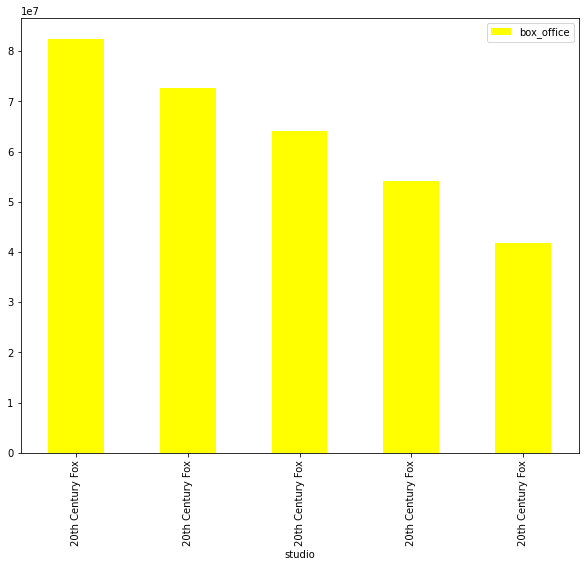

In [236]:
clean.plot(x='studio', y='box_office', kind='bar', figsize=(10, 8), color='yellow')

<span style='font-size:20px'>With this bit of information, we can now see the top studios with the highest box office hits and the director for these studios
We can now merge these two dataframes we have ceaned to create a powerful insight for microoft
first we add a common column to the recent dataframe 

In [237]:
order = ['1', '2', '3', '4', '5']
new_dataframe2 = clean.assign(order = order)

In [238]:
new_dataframe2

,director,studio,box_office,order
378,Adam Shankman,20th Century Fox,82468131,1
1530,Cameron Crowe,20th Century Fox,72700000,2
120,Thor Freudenthal,20th Century Fox,64001297,3
546,Gary Fleder,20th Century Fox,54218420,4
1511,Bobby Farrelly|Peter Farrelly,20th Century Fox,41800000,5


<span style='font-size:20px'>Now the two dataframes are ready to be merged 

In [239]:
Merged_data=pd.merge(new_dataframe, new_dataframe2, on='order', how='outer' )

In [240]:
Merged_data


,movie,Net_profit,order,director,studio,box_office
0,Avatar,2351345279,1,Adam Shankman,20th Century Fox,82468131
1,Avengers: Age of Ultron,1072413963,2,Cameron Crowe,20th Century Fox,72700000
2,Star Wars Ep. VIII: The Last Jedi,999721747,3,Thor Freudenthal,20th Century Fox,64001297
3,Pirates of the Caribbean: On Stranger Tides,635063875,4,Gary Fleder,20th Century Fox,54218420
4,Dark Phoenix,-200237650,5,Bobby Farrelly|Peter Farrelly,20th Century Fox,41800000


<span style='font-size:20px'>I rearrange the columns in an easier order

In [243]:
data_order = Merged_data.reindex(columns=['order','movie', 'Net_profit','director','studio','box_office'])


In [244]:
data_order

,order,movie,Net_profit,director,studio,box_office
0,1,Avatar,2351345279,Adam Shankman,20th Century Fox,82468131
1,2,Avengers: Age of Ultron,1072413963,Cameron Crowe,20th Century Fox,72700000
2,3,Star Wars Ep. VIII: The Last Jedi,999721747,Thor Freudenthal,20th Century Fox,64001297
3,4,Pirates of the Caribbean: On Stranger Tides,635063875,Gary Fleder,20th Century Fox,54218420
4,5,Dark Phoenix,-200237650,Bobby Farrelly|Peter Farrelly,20th Century Fox,41800000


<span style='font-size:20px'>Our merged "data_order" query gives us some insights on what movies have the most net profit, and top studios and directors who have produced the highest bix office hits

# <span style='font-size:20px'>Loading new data

In [276]:
import sqlite3
import pandas as pd
con= sqlite3.connect('targetdir/im.db')

df = pd.read_sql_query("SELECT * FROM movie_basics", con)

In [277]:
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


<span style='font-size:20px'>After analysing this dataframe it seems the only useful data we can get out of it is which genre of movies is more prominent. Therefore i will focus on the genres column

In [278]:
df['genres']

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                    None
146143             Documentary
Name: genres, Length: 146144, dtype: object

<span style='font-size:20px'>Seeing how the values are, we eventually need to use the .explode() fucntion. But first lets use the .split() functions on the commas

In [279]:
df['genres']= df['genres'].str.split(",")

In [281]:
df['genres']

0           [Action, Crime, Drama]
1               [Biography, Drama]
2                          [Drama]
3                  [Comedy, Drama]
4         [Comedy, Drama, Fantasy]
                    ...           
146139                     [Drama]
146140               [Documentary]
146141                    [Comedy]
146142                        None
146143               [Documentary]
Name: genres, Length: 146144, dtype: object

<span style='font-size:20px'>Now we explode genres and assign a new variable

In [287]:
df_new= df.explode('genres')

In [288]:
df_new

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


<span style='font-size:20px'>With our data now unstacked, the only information i can get out of it for an insight is to do a value_count and see how many times each value occurs in the datframe 
We can assign a variable to call later in order to pick our top 5

In [295]:
top_count= df_new['genres'].value_counts()

In [296]:
top_count

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Family          6227
History         6225
Mystery         4659
Music           4314
Fantasy         3516
Sci-Fi          3365
Animation       2799
Sport           2234
News            1551
Musical         1430
War             1405
Western          467
Reality-TV        98
Talk-Show         50
Adult             25
Short             11
Game-Show          4
Name: genres, dtype: int64

<span style='font-size:20px'>We can choose the top 5 for reference

In [297]:
top_count.head()

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Name: genres, dtype: int64

<span style='font-size:20px'>Now we have the top 5 of the most reoccuring genre in this dataframe. With this info i can suggest making a film in one of these genres

<span style='font-size:20px'>After analyzing all the data presented, the 3 suggestions i can offer is
One: from our first data we can look at how the movies selected to follow their formula and hire the top directors to work on them, since our data show These directors produce movies that reach top box office hits.
Two: We saw the studio that also produce movies with high box office hits, we can hire the to produce our first movie
Three: The last data didnt provide much info, however i was able to get the genre of movies that are more popular, popularity can tell us what the onsumers are into. Therefore i can suggest we choose a genre from the top 5 for our first movie.
